In [ ]:
import cmdstanpy
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
!pip install --upgrade cmdstanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cmdstanpy.install_cmdstan()

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


True

Ex 1.

In [ ]:
model = cmdstanpy.CmdStanModel(stan_file='binomial.stan')
samples = model.sample(
    data={'N': 50},
    fixed_param=True,
    iter_sampling=1000, 
    iter_warmup=0, 
    chains = 1
)


DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxr8s3axp/i8_3eekl.json
DEBUG:cmdstanpy:cmd: /content/binomial info
cwd: None
11:09:41 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/binomial', 'id=1', 'random', 'seed=25034', 'data', 'file=/tmp/tmpxr8s3axp/i8_3eekl.json', 'output', 'file=/tmp/tmpxr8s3axp/binomialijz1trb8/binomial-20230323110941.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


11:09:41 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/binomial', 'id=1', 'random', 'seed=25034', 'data', 'file=/tmp/tmpxr8s3axp/i8_3eekl.json', 'output', 'file=/tmp/tmpxr8s3axp/binomialijz1trb8/binomial-20230323110941.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxr8s3axp/binomialijz1trb8/binomial-20230323110941.csv
 console_msgs (if any):
	/tmp/tmpxr8s3axp/binomialijz1trb8/binomial-20230323110941_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Defau

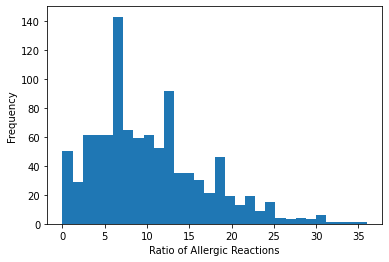

In [ ]:
samples = samples.draws_pd()
samples["y"].plot.hist(bins=30)
plt.xlabel('Ratio of Allergic Reactions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ratio_mean = np.mean(samples['y']) / 50
print(ratio_mean)

0.20366


Ex 2.

In [ ]:
model = cmdstanpy.CmdStanModel(stan_file='stanfile.stan')
samples = model.sample(data={'N': 50, 'y': 7})

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxr8s3axp/iboesvwq.json
DEBUG:cmdstanpy:cmd: /content/stanfile info
cwd: None
11:09:42 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stanfile', 'id=1', 'random', 'seed=39701', 'data', 'file=/tmp/tmpxr8s3axp/iboesvwq.json', 'output', 'file=/tmp/tmpxr8s3axp/stanfileln89q_ib/stanfile-20230323110942_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stanfile', 'id=2', 'random', 'seed=39701', 'data', 'file=/tmp/tmpxr8s3axp/iboesvwq.json', 'output', 'file=/tmp/tmpxr8s3axp/stanfileln89q_ib/stanfile-20230323110942_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/stanfile', 'id=3', 'random', 'seed=39701', 'data', 'file=/tmp/tmpxr8s3axp/iboesvwq.json', 'output', 'file=/tmp/tmpxr8s3axp/stanfileln89q_ib/stanfile-20230323110942_3.csv', 'method=sample', 'algorithm=hmc', 'adap

11:09:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/stanfile', 'id=1', 'random', 'seed=39701', 'data', 'file=/tmp/tmpxr8s3axp/iboesvwq.json', 'output', 'file=/tmp/tmpxr8s3axp/stanfileln89q_ib/stanfile-20230323110942_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxr8s3axp/stanfileln89q_ib/stanfile-20230323110942_1.csv
 console_msgs (if any):
	/tmp/tmpxr8s3axp/stanfileln89q_ib/stanfile-20230323110942_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa 

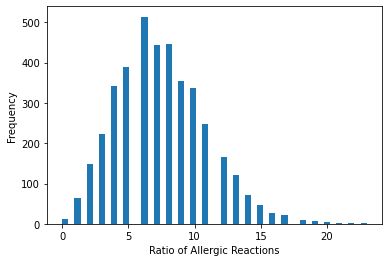

In [ ]:
samples2 = samples.draws_pd()
samples2["y_pred"].plot.hist(bins=50)
plt.xlabel('Ratio of Allergic Reactions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
az_summary = az.summary(samples, var_names=['p', 'y_pred'], round_to=4, hdi_prob=0.94)
print(az_summary)

          mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd   ess_bulk  \
p       0.1489  0.0457  0.0635   0.2307     0.0011   0.0008  1545.5502   
y_pred  7.4798  3.4104  1.0000  13.0000     0.0704   0.0498  2324.6709   

         ess_tail   r_hat  
p       1964.8642  1.0027  
y_pred  3425.2926  1.0012  


In [ ]:
ratio_mean = np.mean(samples2['y_pred']) / 50
prob_lower = np.mean(samples2['y_pred'] / 50 < 0.2)
print('Probability that ratio is lower than 0.2:', prob_lower)

Probability that ratio is lower than 0.2: 0.7345
